In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
data1 = pd.read_csv('data/data1.csv')
data2 = pd.read_csv('data/data2.csv')
data3 = pd.read_csv('data/data3.csv')
data4 = pd.read_csv('data/data4.csv')

In [3]:
data = pd.concat([data1, data2, data3, data4])

In [4]:
data.columns

Index(['taget', 'rssi', 'A1', 'P1', 'A2', 'P2', 'A3', 'P3', 'A4', 'P4',
       ...
       'A48', 'P48', 'A49', 'P49', 'A50', 'P50', 'A51', 'P51', 'A52', 'P52'],
      dtype='object', length=106)

In [5]:
data.head()

,taget,rssi,A1,P1,A2,P2,A3,P3,A4,P4,...,A48,P48,A49,P49,A50,P50,A51,P51,A52,P52
0,applause,-73,0,-13,-1,-14,-2,-15,-2,-15,...,-5,-15,-5,-15,-5,-16,-4,-15,-4,-14
1,applause,-72,-8,-13,-9,-13,-9,-13,-9,-13,...,-15,-9,-15,-10,-14,-10,-13,-10,-13,-10
2,applause,-73,4,-14,4,-14,4,-15,4,-16,...,0,-17,1,-18,1,-18,2,-16,2,-16
3,applause,-73,16,-4,15,-5,15,-6,15,-6,...,14,-12,14,-12,14,-12,15,-11,16,-10
4,applause,-72,-8,12,-8,12,-8,13,-8,13,...,-3,16,-4,16,-5,15,-5,14,-5,15


In [7]:
x_df = data.drop(columns=['taget'])
y_df = data.pop('taget')

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x_df,y_df, random_state=1)

In [9]:
X_train.shape

(1081, 105)

In [10]:
Y_train.shape

(1081,)

In [11]:
X_test.shape

(361, 105)

In [12]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(Y_train)
y_test = encoder.fit_transform(Y_test)

print(y_train.shape)
print(y_test.shape)

(1081,)
(361,)


In [13]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

print(x_train.shape)
print(x_test.shape)

(1081, 105)
(361, 105)


In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(105, activation='relu', input_dim=105))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

In [15]:
model.compile(
    # optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=300, batch_size=20)
model.summary()

Epoch 1/300
44/44 [==============================] - 1s 5ms/step - loss: 1.2892 - accuracy: 0.3310 - val_loss: 1.3334 - val_accuracy: 0.2857
Epoch 2/300
44/44 [==============================] - 0s 2ms/step - loss: 1.2359 - accuracy: 0.3773 - val_loss: 1.2712 - val_accuracy: 0.3456
Epoch 3/300
44/44 [==============================] - 0s 1ms/step - loss: 1.1959 - accuracy: 0.3981 - val_loss: 1.2737 - val_accuracy: 0.3456
Epoch 4/300
44/44 [==============================] - 0s 1ms/step - loss: 1.1704 - accuracy: 0.4144 - val_loss: 1.2208 - val_accuracy: 0.4424
Epoch 5/300
44/44 [==============================] - 0s 1ms/step - loss: 1.1267 - accuracy: 0.4664 - val_loss: 1.0708 - val_accuracy: 0.5253
Epoch 6/300
44/44 [==============================] - 0s 1ms/step - loss: 1.0932 - accuracy: 0.4630 - val_loss: 1.0750 - val_accuracy: 0.4747
Epoch 7/300
44/44 [==============================] - 0s 1ms/step - loss: 1.0434 - accuracy: 0.5093 - val_loss: 0.9815 - val_accuracy: 0.5622
Epoch 8/300
4

In [18]:
accuracy = history.history['accuracy']

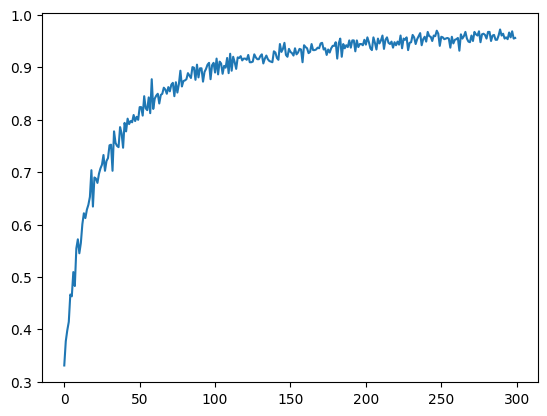

In [19]:
plt.plot(accuracy)

In [20]:
model.save('model.h5')

In [51]:

Ynew = model.predict(x_test[[1]])
print(Ynew)
max_index_row = np.argmax(Ynew, axis=1)
print(max_index_row)




1/1 [==============================] - 0s 17ms/step
[[9.86638406e-06 1.00936213e-25 2.08172388e-03 9.97908473e-01]]
[3]
